In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

4-1

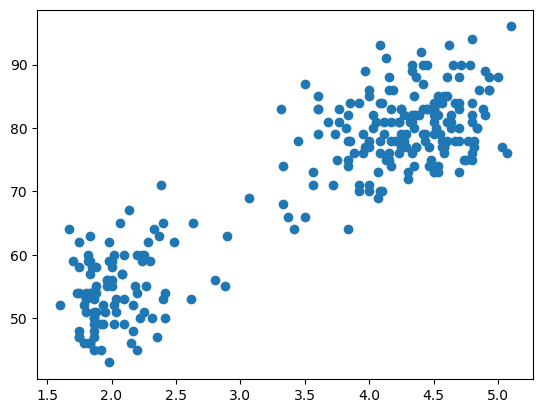

In [2]:
xs = np.loadtxt("old_faithful.txt")

plt.scatter(xs[:, 0], xs[:, 1])
plt.show()

4-2

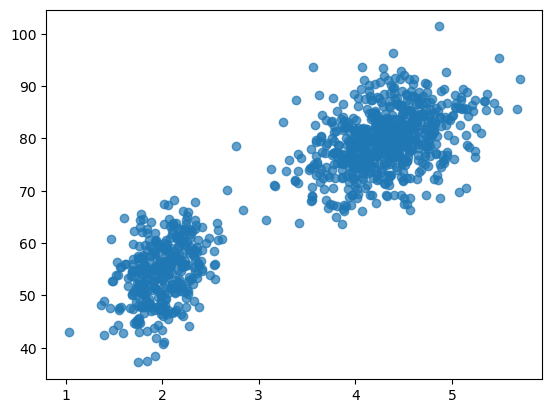

In [4]:
mus = np.array([[2.0, 54.50], 
                [4.3, 80.0]])
covs = np.array([[[0.07, 0.44], 
                  [0.44, 33.7]], 
                 [[0.17, 0.94], 
                  [0.94, 36.00]]])
phis = np.array([0.35, 0.65])


def sample():

    z = np.random.choice(2, p=phis)
    mu, cov = mus[z], covs[z]
    x = np.random.multivariate_normal(mu, cov)

    return x 


N = 1000 
xs = np.zeros([N, 2])
for i in range(N):
    xs[i] = sample()


plt.scatter(xs[:, 0], xs[:, 1], alpha=0.7)
plt.show()

4-3

In [5]:
def multivariate_normal(x, mu, cov):
    
    inv = np.linalg.inv(cov)
    D = len(x) #次元
    y = 1.0 / np.sqrt((2.0 * np.pi)**D * np.linalg.det(cov)) \
      * np.exp(-0.5 * (x - mu).T @ inv @ (x - mu))
    
    return y


def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0.0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multivariate_normal(x, mu, cov)
    
    return y

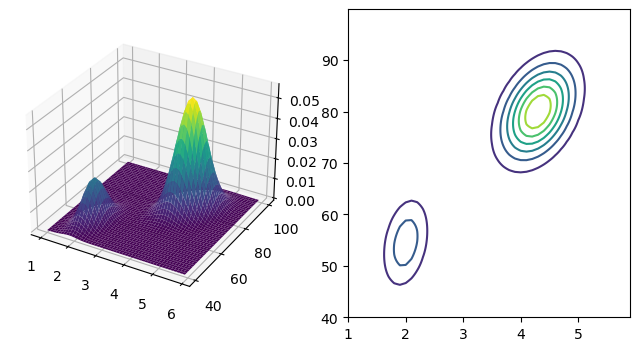

In [9]:
mus = np.array([[2.0, 54.50], 
                [4.3, 80.0]])
covs = np.array([[[0.07, 0.44], 
                  [0.44, 33.7]], 
                 [[0.17, 0.94], 
                  [0.94, 36.00]]])
phis = np.array([0.2, 0.8])


xs = np.arange(1.0, 6.0, 0.1)
ys = np.arange(40.0, 100.0, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, phis, mus, covs)


fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z)

plt.show()